In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28 * 28)).astype('float32') / 255


In [7]:

MODEL = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


MODEL.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [8]:

history = MODEL.fit(train_images, train_labels, epochs=50,verbose=1)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8780 - loss: 0.4154


In [9]:

test_loss, test_acc = MODEL.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9609 - loss: 0.1298
Test Accuracy: 0.9647


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


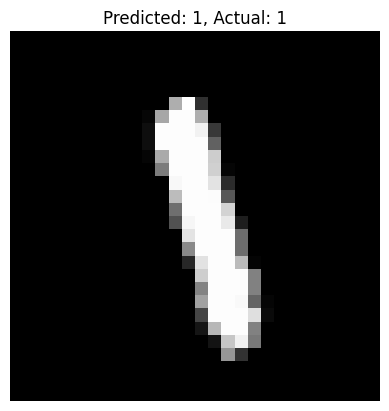

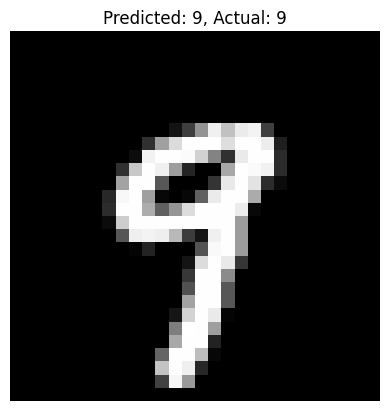

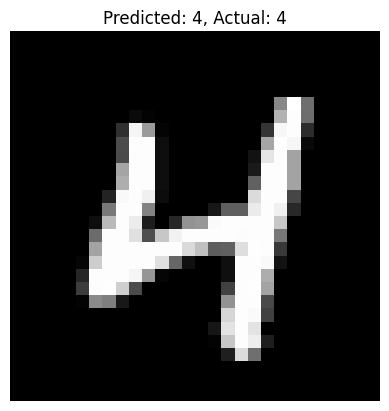

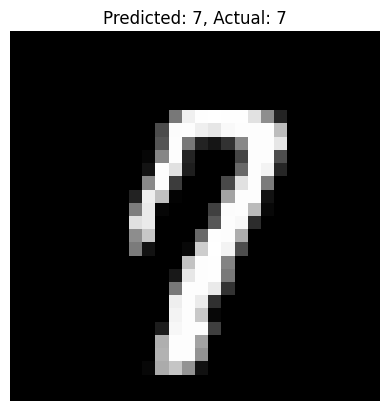

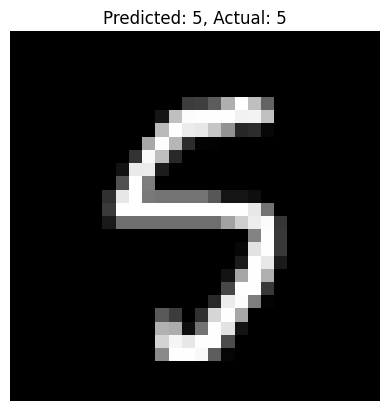

In [12]:
import numpy as np
import matplotlib.pyplot as plt

random_indices = np.random.choice(test_images.shape[0], 5, replace=False)
random_test_images = test_images[random_indices]
random_test_labels = test_labels[random_indices]

predictions = MODEL.predict(random_test_images)

for i in range(5):
    predicted_label = np.argmax(predictions[i])
    actual_label = random_test_labels[i]
    plt.imshow(random_test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    plt.axis('off')
    plt.show()